# Batch 17

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np 
import re
sns.set(rc={'figure.figsize':(12.7,9.27)})

In [31]:
lib_trans=pd.read_excel('issue_records.xlsx')
exam_cell = pd.read_excel('exam_cell_data.xlsx',index_col=0)
sub_code = pd.read_csv('mech.csv')

In [32]:
def assign_semester_lib(lib_data):
    lib_data=lib_data[lib_data['year'].isin([17])]
    lib_data.set_index(lib_data['issue_dt'],inplace=True)
    lib_sem1 = lib_data['2017-08-22':'2017-12-17']
    lib_sem1['semester'] = 1
    lib_sem2 = lib_data['2018-01-29':'2018-06-01']
    lib_sem2['semester'] = 2
    lib_sem3 = lib_data['2018-06-25':'2017-11-19']
    lib_sem3['semester'] = 3
    lib_sem4 = lib_data['2018-12-09':'2019-05-06']
    lib_sem4['semester'] = 4
    lib_sem5= lib_data['2019-06-19':'2019-11-15']
    lib_sem5['semester'] = 5
    lib_frames = [lib_sem1,lib_sem2,lib_sem3,lib_sem4,lib_sem5]
    lib_transaction = pd.concat(lib_frames)
    lib_transaction['book_id'] = lib_transaction.groupby('title').ngroup()
    lib_transaction.drop(columns=['Unnamed: 0'],inplace=True)
    return lib_transaction

In [33]:
lib = assign_semester_lib(lib_data=lib_trans)

In [34]:
lib

,id,level,dept,year,section,access_no,title,issue_dt,due_dt,return_dt,doc,semester,book_id
issue_dt,,,,,,,,,,,,,
2017-09-08,KqEEn7Kg,B,ME,17,1,13910,TEXTBOOK OF FLUID MECHANICS AND HYDRAULIC MACH...,2017-09-08,2017-09-22,2017-09-27,BOOK,1,267
2017-09-08,KqEEn7Kg,B,ME,17,1,41582,THERMODYNAMICS,2017-09-08,2017-09-22,2017-09-27,BOOK,1,284
2017-10-04,KqEEn7Kg,B,ME,17,1,28149,THEORY OF MACHINES,2017-10-04,2017-10-18,2017-11-30,BOOK,1,280
2017-10-04,KqEEn7Kg,B,ME,17,1,33564,TEXTBOOK OF FLUID MECHANICS AND HYDRAULIC MACH...,2017-10-04,2017-10-18,2017-11-23,BOOK,1,267
2017-10-04,KqEEn7Kg,B,ME,17,1,41582,THERMODYNAMICS,2017-10-04,2017-10-18,2017-11-23,BOOK,1,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-18,a9c1Vjuz,B,ME,17,0,5272,STEAM TABLES WITH MOLLIER DIAGRAM,2019-09-18,2019-10-02,2019-09-19,BOOK,5,250
2019-10-23,a9c1Vjuz,B,ME,17,0,42563,DESIGN DATA : DATA BOOK OF ENGINEERS,2019-10-23,2019-11-06,2019-11-05,BOOK,5,52
2019-10-03,WfA1aF9V,B,ME,17,0,42447,DESIGN DATA : DATA BOOK OF ENGINEERS,2019-10-03,2019-10-17,2019-10-09,BOOK,5,52


In [35]:
def exam_cell_clean(data,sub_code):
    data=data[data['year'].isin([17])]
    li = ['FNE', 'GDH','HND1','HND2','BEC','RDS', 'RLD','SPO', 'QIZ', 'CCC','PHO','FLM','SMT']
    # data = data.loc[10973:]
    data = data[~data['subjectcode'].isin(li)]
    sub_code.rename(columns={'Course code':'subjectcode','title':'course_title'},inplace=True)
    exam_cell_merged = pd.merge(data,sub_code,how='inner',on='subjectcode')
    # exam_cell_merged.drop(columns=['Unnamed: 0'],inplace=True)
    return exam_cell_merged

In [36]:
exam = exam_cell_clean(exam_cell,sub_code)

In [37]:
exam

,id,section,level,dept,year,semester,subjectcode,ciamark,esemark,total,credit,grade,course_title
0,KqEEn7Kg,1,B,ME,17,3,16AUT31,30.0,53.0,83.0,3,A+,Engineering Thermodynamics
1,t3iU6rwc,0,B,ME,17,3,16AUT31,30.0,44.0,74.0,3,A,Engineering Thermodynamics
2,L3F2sstj,1,B,ME,17,3,16AUT31,30.0,35.0,65.0,3,B+,Engineering Thermodynamics
3,1PYNQytC,0,B,ME,17,3,16AUT31,37.0,53.0,90.0,3,O,Engineering Thermodynamics
4,R1UwHFu4,1,B,ME,17,3,16AUT31,36.0,54.0,90.0,3,O,Engineering Thermodynamics
...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,AhdwRJ6l,1,B,ME,17,7,16MEE18,23.0,40.0,63.0,3,B+,Process Planning and Cost Estimation
877,KvWC4cRT,1,B,ME,17,5,16MEE01,30.0,41.0,71.0,3,A,"Design for Manufacture, Assembly and Environment"
878,x7G3kk5L,1,B,ME,17,5,16MEE01,31.0,43.0,74.0,3,A,"Design for Manufacture, Assembly and Environment"
879,fFJLoQRs,1,B,ME,17,5,16MEE01,27.0,37.0,64.0,3,B+,"Design for Manufacture, Assembly and Environment"


In [38]:
def assign_subjectcode(data,sub_code,exam_data):
    data.set_index(data['issue_dt'],inplace=True)
    chemistry = data[data['title'].str.contains('CHEMISTRY')==True]
    chemistry['subjectcode'] = '16CYT11'
    physics = data[data['title'].str.contains('PHYSICS')==True]
    physics['subjectcode'] = '16PHT11'
    maths1 = data[data['title'].str.contains('ENGINEERING MATHEMATICS')==True]
    maths1['subjectcode'] = '16MAT11'
    maths2 = data[data['title'].str.contains('ENGINEERING MATHEMATICS II')==True]
    maths2['subjectcode'] = '16MAT21'
    Communication_skills1 = data[data['title'].str.contains('COMMUNICATION')==True]
    Communication_skills1['subjectcode'] = '16ENT11'
    Communication_skills2 = data[data['title'].str.contains('COMMUNICATION')==True]
    Communication_skills2['subjectcode'] = '16ENT21'
    material_science = data[data['title'].str.contains('MATERIAL SCIENCE')==True]
    material_science['subjectcode'] =  '16PHT21'
    engineering_mechanics = data[data['title'].str.contains('ENGINEERING MECHANICS')          ==True]
    engineering_mechanics['subjectcode'] = '16GET21'
    metrology = data[data['title'].str.contains('METROLOGY')==True]
    metrology['subjectcode'] = '16GET22'
    tpde = data[data['title'].str.contains('DIFFERENTIAL')==True]
    tpde['subjectcode'] = '16MAT31'
    thermodynamics = data[data['title'].str.contains('THERMODYNAMICS')==True]
    thermodynamics['subjectcode'] = '16AUT31'
    fluid_mech = data[data['title'].str.contains('FLUID MECHANICS')==True]
    fluid_mech['subjectcode'] = '16AUT32'
    theory_machines1 = data[data['title'].str.contains('THEORY OF MACHINES')==True]
    theory_machines1['subjectcode'] = '16MET33'
    theory_machines2 = data[data['title'].str.contains('THEORY OF MACHINES II')==True]
    theory_machines2['subjectcode'] = '16MET43'
    metallurgy = data[data['title'].str.contains('METALLURGY')==True]
    metallurgy['subjectcode'] = '16MET31'
    mfj = data[data['title'].str.contains('MANUFACTURING PROCESS')==True]
    mfj['subjectcode'] = '16MET32'
    m4 = data[data['title'].str.contains('NUMERICAL METHODS')==True]
    m4['subjectcode'] = '16MAT41'
    c_prog = data[data['title'].str.contains('PROGRAMMING')==True]
    c_prog['subjectcode'] = '16CST46'
    som = data[data['title'].str.contains('STRENGTH OF MATERIALS')==True]
    som['subjectcode'] = '16MET41'
    mcp = data[data['title'].str.contains('METAL CUTTING')==True]
    mcp['subjectcode'] = '16MET42'
    edc = data[data['title'].str.contains('ELECTRICAL DRIVES')==True]
    edc['subjectcode'] = '16EET45'
    dom = data[data['title'].str.contains('DESIGN OF MACHINE ELEMENTS')==True]
    dom['subjectcode'] = '16MET51'
    design_data = data[data['title'].str.contains('DESIGN DATA')==True]
    design_data['subjectcode'] = '16MET51-16MET61'
    thermal = data[data['title'].str.contains('THERMAL')==True]
    thermal['subjectcode'] = '16MET52'
    auto = data[data['title'].str.contains('AUTOMOBILE')==True]
    auto['subjectcode'] = '16MET54'
    micro_cont = data[data['title'].str.contains('MICROCONTROLLER')==True]
    micro_cont['subjectcode'] = '16ECT56'
    fea = data[data['title'].str.contains('FINITE')==True]
    fea['subjectcode'] = '16MET61'
    transmission = data[data['title'].str.contains('DESIGN OF TRANSMISSION')==True]
    transmission['subjectcode'] = '16MET62'
    hmt = data[data['title'].str.contains('HEAT')==True]
    hmt['subjectcode'] = '16MET63'
    powerplant = data[data['title'].str.contains('POWER PLANT')==True]
    powerplant['subjectcode'] = '16MET64'
    mechatronics = data[data['title'].str.contains('MECHATRONICS')==True]
    mechatronics['subjectcode'] = '16MET71'
    evs = data[data['title'].str.contains('ENVIRONMENTAL')==True]
    evs['subjectcode'] = '16CET73'
    frames = [chemistry,physics,material_science,engineering_mechanics,metrology,tpde,maths1,maths2,Communication_skills1,Communication_skills2,theory_machines1,theory_machines2,      thermodynamics,fluid_mech,metallurgy,mfj,m4,c_prog,som,mcp,edc,dom,thermal,auto,        micro_cont,fea,transmission,hmt,powerplant,mechatronics,evs]
    new_data = pd.concat(frames)
    sub_code.rename(columns={'Course code':'subjectcode','title':'course_title'},           inplace=True)
    lib_merged = pd.merge(new_data,sub_code,on='subjectcode',how='inner')
    design_data['subjectcode'] = '16MET51-16MET61'
    design_data['course_title'] = 'Design data Book'
    # frames2 = [maths,theory_machines,Communication_skills,design_data]
    # lib_merged = lib_merged.append(frames2)
    lis = exam_data['id']
    lib_merged = lib_merged[lib_merged['id'].isin(lis)]
    return lib_merged


In [39]:
new_lib = assign_subjectcode(data=lib,sub_code=sub_code,exam_data=exam)

In [40]:
new_lib

,id,level,dept,year,section,access_no,title,issue_dt,due_dt,return_dt,doc,semester,book_id,subjectcode,course_title
74,kGsYbAcj,B,ME,17,0,5803,TEXTBOOK OF MATERIAL SCIENCE AND METALLURGY,2017-10-05,2017-10-19,2017-10-16,BOOK,1,270,16PHT21,Material Science
147,B9byVoMX,B,ME,17,0,26409,ENGINEERING MATHEMATICS,2017-09-09,2017-09-23,2017-09-27,BOOK,1,80,16MAT11,Engineering Mathematics - I
148,B9byVoMX,B,ME,17,0,32107,ENGINEERING MATHEMATICS,2017-10-31,2017-11-14,2017-11-20,BOOK,1,80,16MAT11,Engineering Mathematics - I
186,RA4LTKvt,B,ME,17,1,18547,HIGHER ENGINEERING MATHEMATICS,2019-04-13,2019-04-27,2019-04-27,BOOK,4,139,16MAT11,Engineering Mathematics - I
187,KqEEn7Kg,B,ME,17,1,28149,THEORY OF MACHINES,2017-10-04,2017-10-18,2017-11-30,BOOK,1,280,16MET33,Theory of Machines - |
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,KqEEn7Kg,B,ME,17,1,42250,MECHATRONICS : INTEGRATED MECHANICAL ELECTRONI...,2019-07-13,2019-07-27,2019-08-13,BOOK,5,190,16MET71,'Mechatronics
480,KqEEn7Kg,B,ME,17,1,42250,MECHATRONICS : INTEGRATED MECHANICAL ELECTRONI...,2019-11-08,2019-11-22,2019-11-09,BOOK,5,190,16MET71,'Mechatronics
481,B9byVoMX,B,ME,17,0,32120,MECHATRONICS : A MULTIDISCIPLINARY APPROACH,2019-11-07,2019-11-21,2019-11-09,BOOK,5,189,16MET71,'Mechatronics
482,IZUXluMd,B,ME,17,1,17602,MECHATRONICS: ELECTRONIC CONTROL SYSTEMS IN ME...,2019-06-28,2019-07-12,2019-07-13,BOOK,5,191,16MET71,'Mechatronics


In [116]:
def mean_score(lib_data,exam_data):
    class_mean_per_sem = pd.DataFrame()
    # class_mean_per_sem['mean_score_sec'] = exam_data.groupby(['section','semester','subjectcode'])['total'].mean()
    class_mean_per_sem['library_id_frequency'] = lib_data.groupby(['section','semester','subjectcode'])['id'].count()
    class_mean_per_sem.reset_index(inplace=True)
    course_mean_per_sem = pd.DataFrame()
    # course_mean_per_sem['course_mean_score'] = exam_data.groupby(['section','semester','subjectcode'])['total'].mean()
    course_mean_per_sem['library_freq_course_by_id'] = lib_data.groupby(['section','semester','subjectcode'])['id'].count()
    course_mean_per_sem.reset_index(inplace=True)
    return class_mean_per_sem,course_mean_per_sem


In [117]:
class_mean_score,course_mean_score = mean_score(lib_data=new_lib,exam_data=exam)

In [118]:
class_mean_score

,section,semester,subjectcode,library_id_frequency
0,0,1,16AUT31,5
1,0,1,16AUT32,8
2,0,1,16MAT11,2
3,0,1,16MET31,3
4,0,1,16MET33,10
5,0,1,16PHT21,1
6,0,2,16CST46,4
7,0,2,16EET45,3
8,0,2,16MAT41,2
9,0,2,16MET33,12


In [109]:
course_mean_score['section'].replace(to_replace=0,value='A',inplace=True)
course_mean_score['section'].replace(to_replace=1,value='B',inplace=True)

In [102]:
import matplotlib.pyplot as plt 

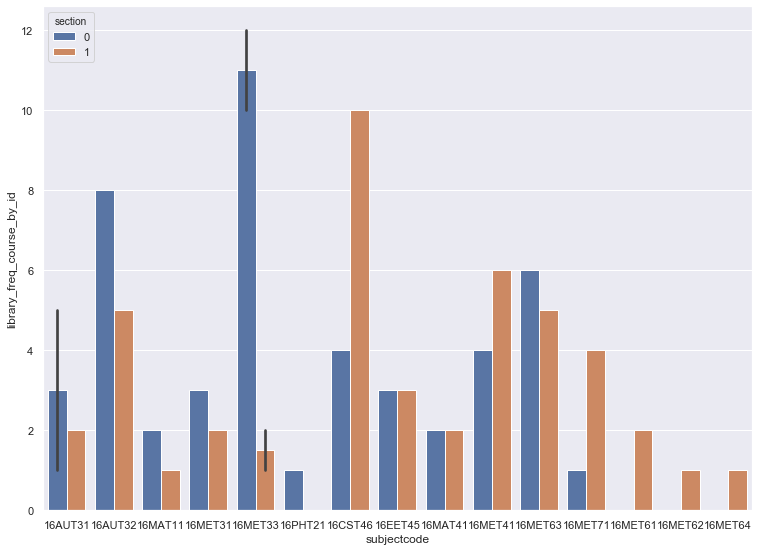

In [119]:
sns.barplot(course_mean_score['subjectcode'],course_mean_score['library_freq_course_by_id'],hue='section',data=course_mean_score)

<BarContainer object of 29 artists>

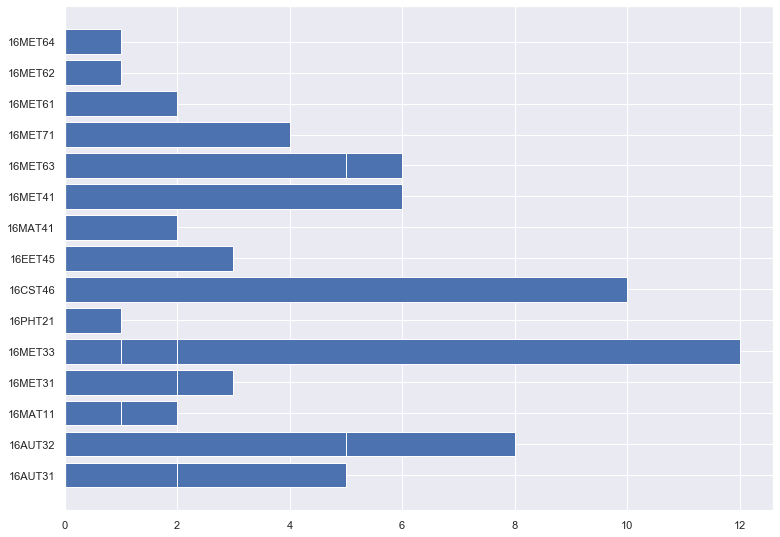

In [89]:
plt.barh(course_mean_score['subjectcode'],course_mean_score['library_freq_course_by_id'])

<BarContainer object of 29 artists>

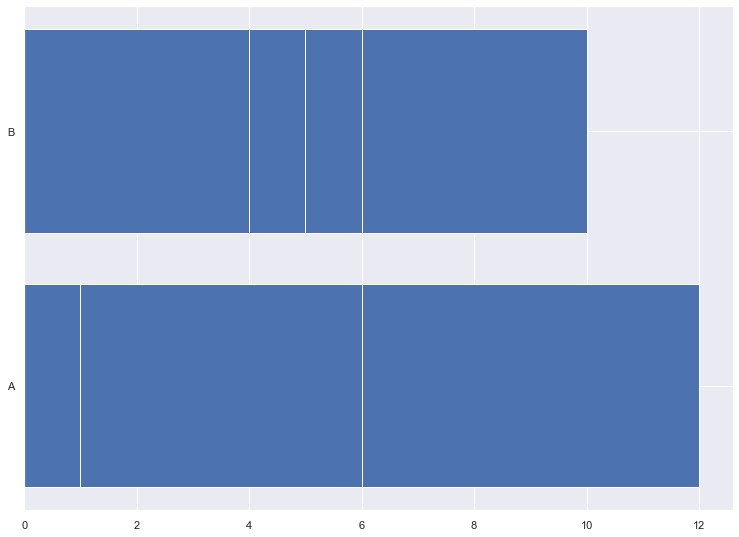

In [88]:
plt.barh(course_mean_score['section'],course_mean_score['library_freq_course_by_id'])

In [50]:
course_mean_score.isnull().sum()

section                      0
semester                     0
subjectcode                  0
library_freq_course_by_id    0
dtype: int64

In [51]:
def plotting(exam_cell,class_mean,course_mean):
    sem1 = exam[exam['semester']==1]
    sem2 = exam[exam['semester']==2]
    sem3 = exam[exam['semester']==3]
    sem4 = exam[exam['semester']==4]
    sem5 = exam[exam['semester']==5]
    # sns.violinplot(x='subjectcode',y='total',hue='section',data=sem1)
    # sns.violinplot(x='subjectcode',y='total',hue='section',data=sem2)
    # sns.violinplot(x='subjectcode',y='total',hue='section',data=sem3)
    # sns.violinplot(x='subjectcode',y='total',hue='section',data=sem4)
    # sns.violinplot(x='subjectcode',y='total',hue='section',data=sem5)
    # sns.violinplot(x='subjectcode',y='total',hue='section',data=sem6)
    # sns.violinplot(x='subjectcode',y='total',hue='section',data=sem7)
    # sns.heatmap(data=class_mean.corr(method='pearson'),annot=True)
    # sns.heatmap(data=course_mean.corr(method='pearson'),annot=True)

    return sns.heatmap(data=course_mean.corr(method='pearson'),annot=True)
    

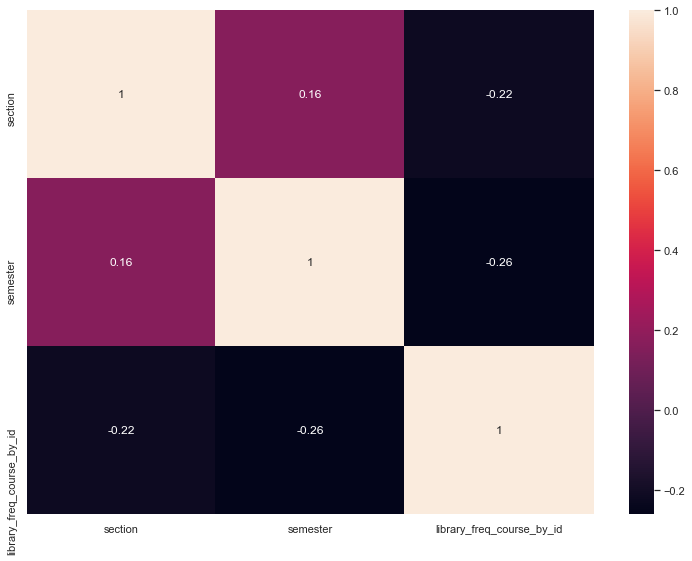

In [52]:
plotting(exam_cell=exam,class_mean=class_mean_score,course_mean=course_mean_score)